In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 500)

import time
import numpy as np
input_directory = './parsed_data'

In [2]:
data = pd.read_csv('./k_30results.csv')

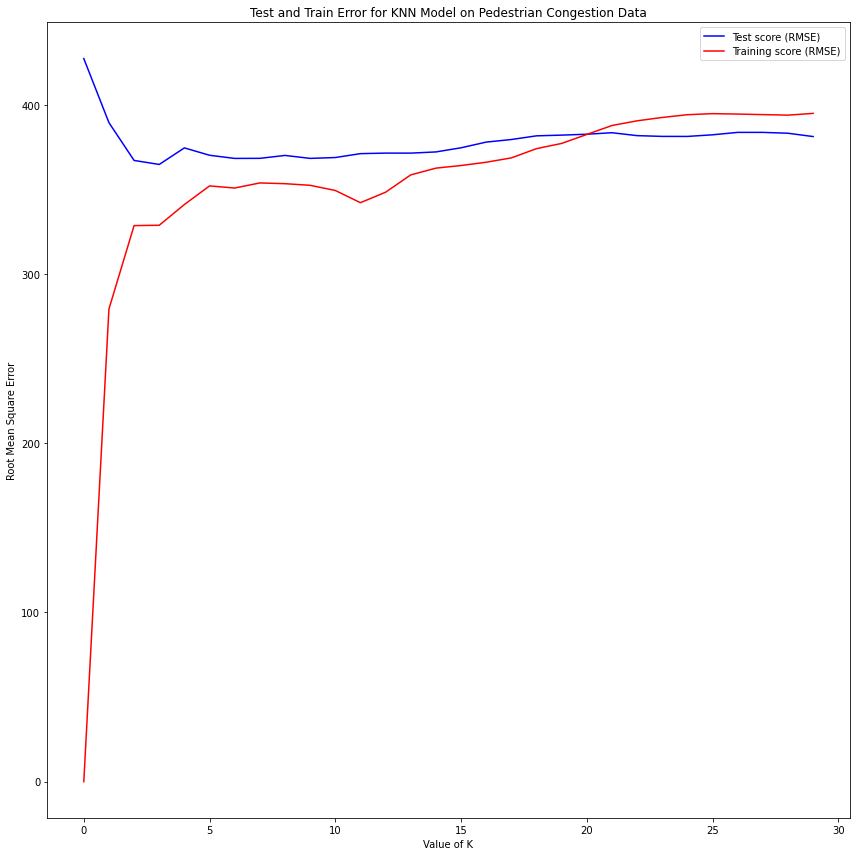

In [3]:
plt.subplots(1, figsize=(12,12))
plt.plot(data.test_error, label="Test score (RMSE)", color="Blue")
plt.plot(data.train_error, label="Training score (RMSE)", color="Red")

plt.title("Test and Train Error for KNN Model on Pedestrian Congestion Data")
plt.xlabel("Value of K")
plt.ylabel("Root Mean Square Error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

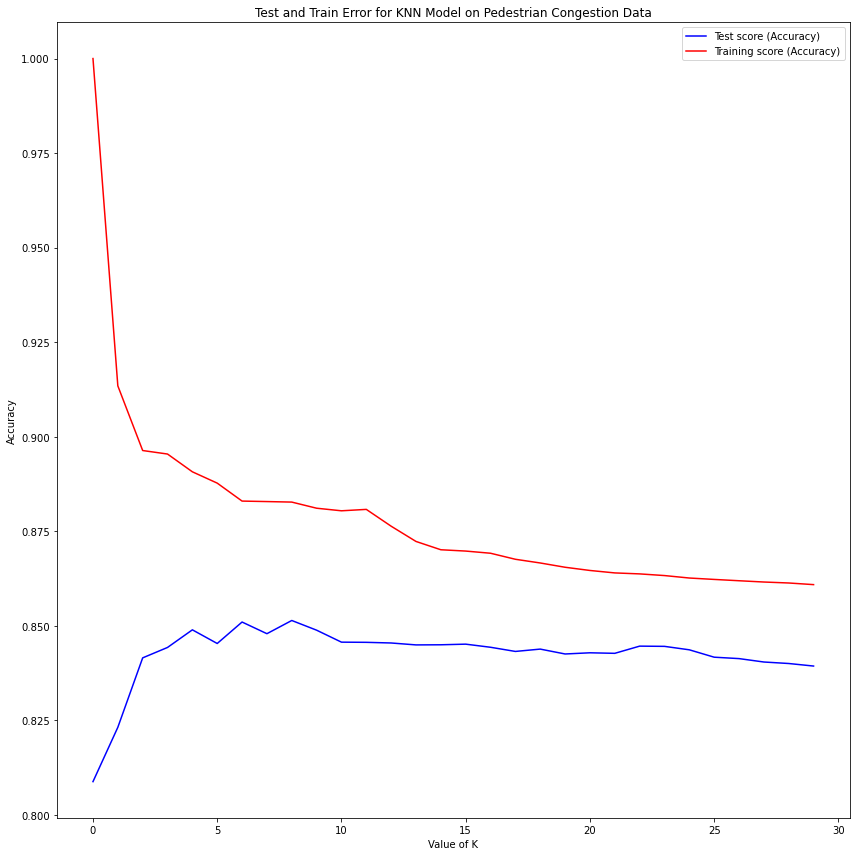

In [4]:
plt.subplots(1, figsize=(12,12))
plt.plot(data.test_accuracy, label="Test score (Accuracy)", color="Blue")
plt.plot(data.train_accuracy, label="Training score (Accuracy)", color="Red")

plt.title("Test and Train Error for KNN Model on Pedestrian Congestion Data")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [6]:
data[['k','train_error','test_error','train_accuracy','test_accuracy','low_precision','low_recall','high_precision','high_recall']]

,k,train_error,test_error,train_accuracy,test_accuracy,low_precision,low_recall,high_precision,high_recall
0,1,0.000000,427.387923,1.000000,0.808820,0.848932,0.813248,0.724479,0.739858
1,2,279.365789,389.496715,0.913464,0.823184,0.831741,0.840212,0.777701,0.768602
2,3,328.661217,367.164034,0.896364,0.841546,0.818575,0.874733,0.815482,0.760333
3,4,328.849560,364.795278,0.895437,0.844300,0.815549,0.884990,0.811909,0.755792
4,5,341.111621,374.586556,0.890739,0.848958,0.818254,0.888623,0.821013,0.759303
5,6,352.105704,370.228745,0.887746,0.845347,0.818090,0.883405,0.805438,0.745491
6,7,350.862517,368.361828,0.882999,0.851020,0.823249,0.885729,0.811368,0.755929
7,8,353.867206,368.408284,0.882870,0.847938,0.810654,0.891249,0.826216,0.748054
8,9,353.428285,370.128540,0.882733,0.851428,0.808551,0.898588,0.821432,0.733045
9,10,352.461671,368.379371,0.881113,0.848865,0.807015,0.895474,0.817016,0.748577
